In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
dat=pd.read_csv('mobility-trends.csv')

In [3]:
dat

,geo_type,region,transportation_type,date,value
0,country/region,Albania,driving,2020-01-13,100.00
1,country/region,Albania,driving,2020-01-14,95.30
2,country/region,Albania,driving,2020-01-15,101.43
3,country/region,Albania,driving,2020-01-16,97.20
4,country/region,Albania,driving,2020-01-17,103.55
...,...,...,...,...,...
41470,city,Zurich,walking,2020-04-22,72.35
41471,city,Zurich,walking,2020-04-23,73.64
41472,city,Zurich,walking,2020-04-24,76.72
41473,city,Zurich,walking,2020-04-25,78.56


In [229]:
set(dat['geo_type'])

{'city', 'country/region'}

In [279]:
w=np.where(dat['geo_type']=='country/region')
Country=set(dat['region'][w[0]])

In [6]:
t1=0
t2=0
for p in Country:
    ip=np.where(dat['region']==p)
    if (len(dat['date'][ip[0]])==210):
        t1+=1
        print('Tiene 210:'+p)
    else:
        t2+=1
        print('Tiene ' + str(len(dat['date'][ip[0]]))+':'+p)
print(t1,t2)
print(len(Country))

Tiene 315:Finland
Tiene 315:Slovakia
Tiene 315:Germany
Tiene 315:Norway
Tiene 210:Chile
Tiene 210:Thailand
Tiene 210:India
Tiene 210:Republic of Korea
Tiene 210:Austria
Tiene 315:Brazil
Tiene 315:Ireland
Tiene 315:Czech Republic
Tiene 315:Philippines
Tiene 210:Iceland
Tiene 210:Turkey
Tiene 210:Serbia
Tiene 210:Lithuania
Tiene 315:Canada
Tiene 210:Egypt
Tiene 210:Argentina
Tiene 315:Belgium
Tiene 315:Singapore
Tiene 210:Bulgaria
Tiene 315:Switzerland
Tiene 210:Vietnam
Tiene 315:Sweden
Tiene 210:Latvia
Tiene 210:Hong Kong
Tiene 210:Indonesia
Tiene 315:United States
Tiene 210:Croatia
Tiene 315:New Zealand
Tiene 210:Poland
Tiene 315:Japan
Tiene 315:France
Tiene 315:Luxembourg
Tiene 210:United Arab Emirates
Tiene 210:Cambodia
Tiene 210:Portugal
Tiene 315:Mexico
Tiene 210:Uruguay
Tiene 315:Netherlands
Tiene 210:Greece
Tiene 315:Taiwan
Tiene 210:Macao
Tiene 315:Denmark
Tiene 315:UK
Tiene 210:Israel
Tiene 210:Morocco
Tiene 315:Spain
Tiene 315:Australia
Tiene 210:Malaysia
Tiene 210:South Afric

In [7]:
dat.keys()

Index(['geo_type', 'region', 'transportation_type', 'date', 'value'], dtype='object')

In [8]:
i=np.where(dat['region']=='Colombia')

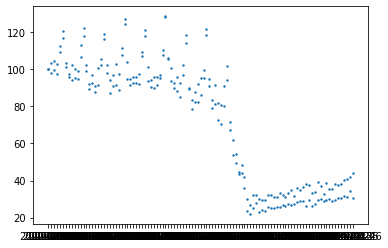

In [9]:
plt.scatter(dat['date'][i[0]],dat['value'][i[0]],s=2)

In [10]:
i1=np.where((dat['region']=='Colombia') & (dat['transportation_type']=='driving'))
i2=np.where((dat['region']=='Colombia') & (dat['transportation_type']=='transit'))
i3=np.where((dat['region']=='Colombia') & (dat['transportation_type']=='walking'))

Text(0.5, 1.0, 'Types of Transportation in Colombia')

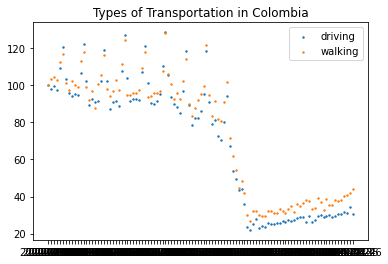

In [11]:
plt.scatter(dat['date'][i1[0]],dat['value'][i1[0]],s=2,label='driving')
plt.scatter(dat['date'][i3[0]],dat['value'][i3[0]],s=2,label='walking')
plt.legend(loc=0.0)
plt.title('Types of Transportation in Colombia')

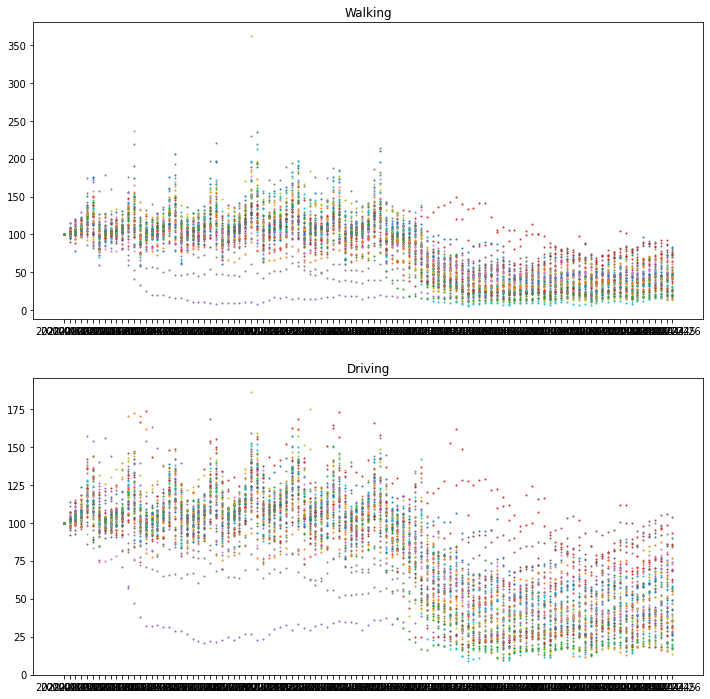

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title('Walking')
for p in Country:
    ip=np.where((dat['region']==p) & (dat['transportation_type']=='walking'))
    plt.scatter(dat['date'][ip[0]],dat['value'][ip[0]],s=1)
plt.subplot(212)
plt.title('Driving')
for p in Country:
    ip=np.where((dat['region']==p) & (dat['transportation_type']=='driving'))
    plt.scatter(dat['date'][ip[0]],dat['value'][ip[0]],s=1)

In [234]:
np.array(dat['value'][i3[0]])

array([100.  , 103.15, 104.44, 102.96, 112.65, 116.71, 101.  ,  97.52,
       102.29, 100.24,  98.95, 113.08, 117.66,  98.95,  91.84,  96.66,
        87.78, 100.43, 105.35, 116.13,  97.66,  93.94,  96.61, 103.01,
        97.18, 111.12, 124.15,  94.51,  94.8 ,  95.7 ,  95.7 ,  97.37,
       109.45, 117.66,  93.6 ,  94.03,  95.51,  95.66,  96.85, 107.59,
       127.88, 105.82, 100.57,  92.51,  95.56,  92.46, 102.34, 114.18,
        89.88,  83.44,  87.83,  91.74,  95.42,  99.47, 121.48,  94.89,
        83.34,  91.36,  82.  ,  80.53,  90.69, 101.43,  71.69,  61.72,
        54.08,  44.63,  48.16,  41.81,  30.26,  26.73,  32.27,  32.22,
        29.79,  29.69,  29.26,  31.93,  32.36,  31.17,  31.26,  33.22,
        31.93,  31.26,  33.46,  34.84,  31.6 ,  35.94,  34.75,  36.42,
        37.85,  37.47,  33.32,  33.7 ,  39.05,  36.95,  32.7 ,  38.71,
        35.42,  35.42,  38.33,  37.61,  37.9 ,  40.53,  40.81,  41.81,
        43.82])

In [14]:
dat_2=pd.read_csv('current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv')

In [15]:
dat_2

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
0,NaN,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,NaN,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,NaN,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,NaN,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,NaN,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
13618,NaN,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
13619,NaN,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
13620,NaN,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
13621,NaN,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [53]:
len(set(dat_2['countriesandterritories']))

207

In [16]:
dat_2.keys()

Index(['daterep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesandterritories', 'geoid', 'countryterritorycode',
       'popdata2018', 'continentexp'],
      dtype='object')

In [17]:
j=np.where(dat_2['countriesandterritories']=='Colombia')

In [18]:
n=len(j[0])

In [19]:
np.array(dat_2)[j[0],:]

array([[nan, 28, 4, 2020, 218, 10, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 27, 4, 2020, 237, 10, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 26, 4, 2020, 261, 8, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 25, 4, 2020, 320, 10, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 24, 4, 2020, 205, 9, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 23, 4, 2020, 207, 10, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 22, 4, 2020, 172, 7, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 21, 4, 2020, 185, 10, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 20, 4, 2020, 171, 13, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 19, 4, 2020, 182, 13, 'Colombia', 'CO', 'COL', 49648685.0,
        'America'],
       [nan, 18, 4, 2020, 206, 9, 'Colombia', 'CO', 'COL', 49648685.0,
        'Ame

In [20]:
a=[]
for i in range(n):
    a.append(str(np.array(dat_2)[j[0],1][i])+'/0'+str(np.array(dat_2)[j[0],2][i])+'/2020')

In [21]:
death = dat_2['deaths'][j[0]]
cases = dat_2['cases'][j[0]]

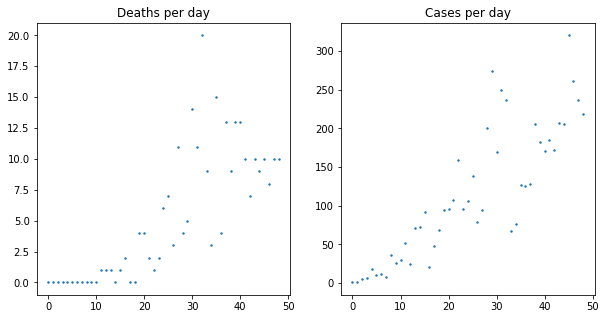

In [22]:
x=abs(np.arange(1-n,1))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Deaths per day')
plt.scatter(x,death,s=2)
plt.subplot(122)
plt.title('Cases per day')
plt.scatter(x,cases,s=2)

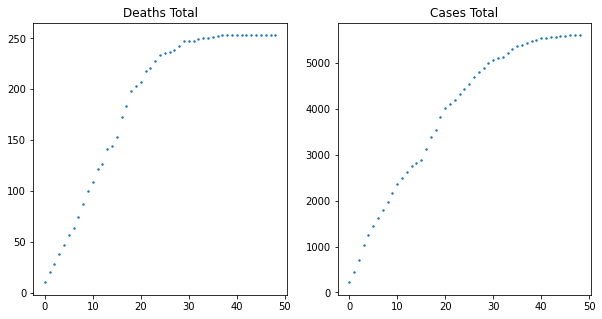

In [23]:
y=abs(np.arange(n))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Deaths Total')
plt.scatter(y,np.cumsum(np.array(death)),s=2)
plt.subplot(122)
plt.title('Cases Total')
plt.scatter(y,np.cumsum(np.array(cases)),s=2)

In [24]:
np.cumsum(np.array(death))

array([ 10,  20,  28,  38,  47,  57,  64,  74,  87, 100, 109, 122, 126,
       141, 144, 153, 173, 184, 198, 203, 207, 218, 221, 228, 234, 236,
       237, 239, 243, 247, 247, 247, 249, 250, 250, 251, 252, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253])

In [25]:
data_3=pd.read_csv('coronavirus-world-airport-impacts.csv')

In [26]:
data_3.keys()

Index(['geometry', 'ident', 'type', 'name', 'latitude_d', 'longitude',
       'elevation', 'continent', 'iso_countr', 'iso_region', 'municipali',
       'scheduled', 'gps_code', 'iata_code', 'status', 'objectid'],
      dtype='object')

In [246]:
set(data_3['type'])

{'large_airport', 'medium_airport'}

In [27]:
data_3

,geometry,ident,type,name,latitude_d,longitude,elevation,continent,iso_countr,iso_region,municipali,scheduled,gps_code,iata_code,status,objectid
0,POINT (-76.5008 0.505228),SKAS,medium_airport,Tres De Mayo Airport,0.505228,-76.500800,815,South America,CO,CO-PUT,Puerto Asís,yes,SKAS,PUU,NaN,3001
1,POINT (-73.1848 7.1265),SKBG,medium_airport,Palonegro Airport,7.126500,-73.184800,3897,South America,CO,CO-SAN,Bucaramanga,yes,SKBG,BGA,NaN,3002
2,POINT (-74.1469 4.70159),SKBO,large_airport,El Dorado International Airport,4.701590,-74.146900,8361,South America,CO,CO-CUN,Bogota,yes,SKBO,BOG,Restrictions,3003
3,POINT (-74.7808 10.8896),SKBQ,medium_airport,Ernesto Cortissoz International Airport,10.889600,-74.780800,98,South America,CO,CO-ATL,Barranquilla,yes,SKBQ,BAQ,Restrictions,3004
4,POINT (-77.3947 6.20292),SKBS,medium_airport,José Celestino Mutis Airport,6.202920,-77.394700,80,South America,CO,CO-CHO,Bahía Solano,yes,SKBS,BSC,NaN,3005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,POINT (152.8800049 -25.31889915),YHBA,medium_airport,Hervey Bay Airport,-25.318899,152.880005,60,Australia,AU,AU-QLD,Hervey Bay,yes,YHBA,HVB,NaN,2996
3076,POINT (142.2899933 -10.58640003),YHID,medium_airport,Horn Island Airport,-10.586400,142.289993,43,Australia,AU,AU-QLD,Horn Island,yes,YHID,HID,NaN,2997
3077,POINT (147.3339996 -37.04750061),YHOT,medium_airport,Mount Hotham Airport,-37.047501,147.334000,4260,Australia,AU,AU-VIC,Mount Hotham,yes,YHOT,MHU,NaN,2998
3078,POINT (143.878006 -39.87749863),YKII,medium_airport,King Island Airport,-39.877499,143.878006,132,Australia,AU,AU-TAS,NaN,yes,YKII,KNS,NaN,2999


In [28]:
p=np.where(data_3['iso_countr'] == 'CO')

In [54]:
len(set(data_3['iso_countr']))

231

In [29]:
data_3['municipali'][p[0]]

0                  Puerto Asís
1                  Bucaramanga
2                       Bogota
3                 Barranquilla
4                 Bahía Solano
5                 Buenaventura
6                       Cúcuta
7                    Cartagena
8                         Cali
9                       Tumaco
10                     Corozal
11             Barrancabermeja
12                   Florencia
13                     Cartago
14                       Guapi
2291                    Ibagué
2292                   Ipiales
2293                    Carepa
2294                   Leticia
2295                  Medellín
2296                  Montería
2297                      Mitú
2298                 Manizales
2299                     Neiva
2300            Puerto Carreño
2301                   Pereira
2302                   Popayán
2303                     Pasto
2304               Providencia
2305                  Rionegro
2306                  Riohacha
2307     San José Del Guaviare
2308    

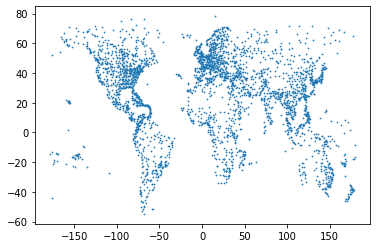

In [30]:
plt.scatter(data_3['longitude'],data_3['latitude_d'],s=0.5)

In [31]:
A=set(data_3['continent'])

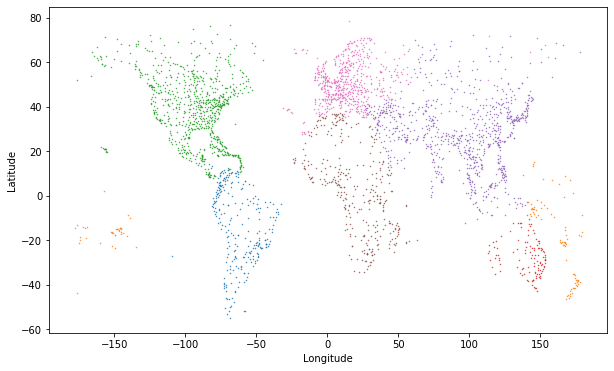

In [32]:
plt.figure(figsize=(10,6))
for i in A:
    k = np.where(data_3['continent']==i)
    plt.scatter(data_3['longitude'][k[0]],data_3['latitude_d'][k[0]],s=0.2,label=i)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig('mapa_f.png')

In [33]:
dat_4=pd.read_csv('acaps-covid-19-government-measures-dataset.csv')

In [34]:
dat_4.keys()

Index(['id', 'country', 'iso', 'admin_level_name', 'pcode', 'region',
       'category', 'measure', 'targeted_pop_group', 'comments',
       'non_compliance', 'date_implemented', 'source', 'source_type', 'link',
       'entry_date', 'alternative_source'],
      dtype='object')

In [35]:
dat_4

,id,country,iso,admin_level_name,pcode,region,category,measure,targeted_pop_group,comments,non_compliance,date_implemented,source,source_type,link,entry_date,alternative_source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,f,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,f,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Awareness campaigns,f,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,f,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Social distancing,Limit public gatherings,f,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,1959,Zimbabwe,ZWE,NaN,NaN,Africa,Social distancing,Limit public gatherings,f,Hospital visits have been reduced to one visit...,NaN,2020-03-24,Ministry of Health,Social media,https://twitter.com/MoHCCZim/status/1242180289...,2020-03-24,NaN
4145,1960,Zimbabwe,ZWE,NaN,NaN,Africa,Public health measures,Introduction of quarantine policies,f,All our returning residents will be subjected ...,NaN,2020-03-24,The Herald,Media,https://www.herald.co.zw/new-measures-to-stop-...,2020-03-24,NaN
4146,1961,Zimbabwe,ZWE,NaN,NaN,Africa,Public health measures,Health screenings in airports and border cross...,f,All our returning residents will be subjected ...,NaN,2020-03-24,The Herald,Media,https://www.herald.co.zw/new-measures-to-stop-...,2020-03-24,NaN
4147,1962,Zimbabwe,ZWE,NaN,NaN,Africa,Social distancing,Schools closure,f,Zimbabwe closes all schools.,NaN,2020-03-24,News Day,Media,https://www.newsday.co.zw/2020/03/ed-orders-sc...,2020-03-24,NaN


In [250]:
ii=np.where(dat_4['iso']=='COL')
print(len(set(dat_4['country'])))

193


In [251]:
dat_4['measure'][ii[0]]

756                          State of emergency declared
757                  Introduction of quarantine policies
758    Additional health/documents requirements upon ...
759                                      Schools closure
760                                    Visa restrictions
761                  Introduction of quarantine policies
762    Additional health/documents requirements upon ...
763                          State of emergency declared
764                                       Border closure
765                                       Border closure
766                                     Partial lockdown
767                     International flights suspension
768                  Introduction of quarantine policies
769                              Limit public gatherings
770                                     Partial lockdown
771                         Domestic travel restrictions
772                                    Economic measures
773                            

In [38]:
dat_5=pd.read_csv('global-school-closures-covid-19.csv')

In [39]:
dat_5.keys()

Index(['date', 'iso', 'country', 'scale', 'note'], dtype='object')

In [40]:
dat_5

,date,iso,country,scale,note
0,2020-02-16,CHN,China,Localized,NaN
1,2020-02-16,CHN,"China, Hong Kong Special Administrative Region",Localized,NaN
2,2020-02-16,CHN,"China, Macao Special Administrative Region",Localized,NaN
3,2020-02-16,MNG,Mongolia,National,The government mandated school closures on 27 ...
4,2020-02-17,CHN,China,Localized,NaN
...,...,...,...,...,...
6407,2020-04-15,WSM,Samoa,National,NaN
6408,2020-04-15,YEM,Yemen,National,NaN
6409,2020-04-15,ZAF,South Africa,National,NaN
6410,2020-04-15,ZMB,Zambia,National,NaN


In [41]:
c=np.where(dat_5['country']=='Colombia')

In [42]:
np.array(dat_5)[c[0],:]

array([['2020-03-16', 'COL', 'Colombia', 'National', nan],
       ['2020-03-17', 'COL', 'Colombia', 'National', nan],
       ['2020-03-18', 'COL', 'Colombia', 'National', nan],
       ['2020-03-19', 'COL', 'Colombia', 'National', nan],
       ['2020-03-20', 'COL', 'Colombia', 'National', nan],
       ['2020-03-21', 'COL', 'Colombia', 'National', nan],
       ['2020-03-22', 'COL', 'Colombia', 'National', nan],
       ['2020-03-23', 'COL', 'Colombia', 'National', nan],
       ['2020-03-24', 'COL', 'Colombia', 'National', nan],
       ['2020-03-25', 'COL', 'Colombia', 'National', nan],
       ['2020-03-26', 'COL', 'Colombia', 'National', nan],
       ['2020-03-27', 'COL', 'Colombia', 'National', nan],
       ['2020-03-28', 'COL', 'Colombia', 'National', nan],
       ['2020-03-29', 'COL', 'Colombia', 'National', nan],
       ['2020-03-30', 'COL', 'Colombia', 'National', nan],
       ['2020-03-31', 'COL', 'Colombia', 'National', nan],
       ['2020-04-01', 'COL', 'Colombia', 'National', nan

In [228]:
N=[]
B=set(dat_5['country'])
for i in B:
    m=np.where(dat_5['country']==i)
    N.append(len(m[0]))
len(B)

198

In [63]:
dat_6=pd.read_csv('regional-mobility.csv')

Index(['country', 'region', 'date', 'retail', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [62]:
dat_6.keys()

In [64]:
dat_6

,country,region,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,United Arab Emirates,Total,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,Total,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,Total,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,Total,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,Total,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
78727,Zimbabwe,Total,2020-04-13,-71.0,-63.0,-51.0,-83.0,-80.0,49.0
78728,Zimbabwe,Total,2020-04-14,-63.0,-53.0,-47.0,-78.0,-64.0,41.0
78729,Zimbabwe,Total,2020-04-15,-62.0,-50.0,-51.0,-77.0,-65.0,42.0
78730,Zimbabwe,Total,2020-04-16,-62.0,-50.0,-48.0,-77.0,-64.0,42.0


In [89]:
pred=dat_6.keys()[3:]
dat_6[pred]

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,0.0,4.0,5.0,0.0,2.0,1.0
1,1.0,4.0,4.0,1.0,2.0,1.0
2,-1.0,1.0,5.0,1.0,2.0,1.0
3,-2.0,1.0,5.0,0.0,2.0,1.0
4,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...
78727,-71.0,-63.0,-51.0,-83.0,-80.0,49.0
78728,-63.0,-53.0,-47.0,-78.0,-64.0,41.0
78729,-62.0,-50.0,-51.0,-77.0,-65.0,42.0
78730,-62.0,-50.0,-48.0,-77.0,-64.0,42.0


In [95]:
d1=np.array(dat_6[pred])
Cou=[]
for p in cp:
    i_p=np.where(dat_6['country']==p)
    if (np.sum(np.isnan(np.mean(d1[i_p[0]],axis=0)))==0):
        Cou.append(p)

In [126]:
d=np.array(dat_6)
mean=np.zeros((len(Cou),6))
for p in range(len(Cou)):
    i_p=np.where(dat_6['country']==Cou[p])
    mean[p,:]=np.mean(d1[i_p[0]],axis=0)

In [128]:
print(np.shape(mean),len(Cou))

(83, 6) 83


In [131]:
dat_7=pd.read_csv('total-covid-19-tests-performed-by-country.csv')

In [132]:
dat_7

,entity,code,year,total_covid_19_tests
0,Armenia,ARM,57,813
1,Australia,AUS,59,113615
2,Australia - Australian Capital Territory,NaN,59,2062
3,Australia - New South Wales,NaN,58,39089
4,Australia - Queensland,NaN,58,27000
...,...,...,...,...
72,United Arab Emirates,ARE,55,125000
73,United Kingdom,GBR,58,64621
74,United States,USA,58,103945
75,United States - CDC samples tested,NaN,53,37646


In [266]:
LA=list(LA)
for i in LA:
    i_la=np.where(dat_7['entity']==i)
    print(dat_7['total_covid_19_tests'][i_la[0]],i)

Series([], Name: total_covid_19_tests, dtype: int64) Chile
Series([], Name: total_covid_19_tests, dtype: int64) Argentina
Series([], Name: total_covid_19_tests, dtype: int64) Peru
Series([], Name: total_covid_19_tests, dtype: int64) Uruguay
13    2927
Name: total_covid_19_tests, dtype: int64 Brazil
Series([], Name: total_covid_19_tests, dtype: int64) Ecuador
24    4103
Name: total_covid_19_tests, dtype: int64 Colombia


In [294]:
d7=np.array(dat_7['code'])

In [295]:
D7=list(set(d7))
D7=D7[1:]
D7=list(D7)
D7.remove('HKG')
len(D7)

58

In [299]:
name_f=dat_2['countriesandterritories']
iso=dat_2['countryterritorycode']
for c in D7:
    x=np.where(iso==c)[0][0]
    #np.where(dat['region']==name_f[x]),
    print(name_f[x],c)

Mexico MEX
Netherlands NLD
France FRA
Australia AUS
Iceland ISL
Indonesia IDN
Colombia COL
Armenia ARM
Vietnam VNM
Malta MLT
New_Zealand NZL
Ukraine UKR
Japan JPN
Bahrain BHR
Panama PAN
Malaysia MYS
Germany DEU
Philippines PHL
Slovenia SVN
Romania ROU
Denmark DNK
Palestine PSE
Iran IRN
South_Africa ZAF
Israel ISR
Pakistan PAK
Kyrgyzstan KGZ
Latvia LVA
Norway NOR
Sweden SWE
Poland POL
Brazil BRA
South_Korea KOR
Spain ESP
Czechia CZE
Russia RUS
Croatia HRV
Ireland IRL
Estonia EST
Italy ITA
Lithuania LTU
Thailand THA
Finland FIN
Faroe_Islands FRO
Belarus BLR
Costa_Rica CRI
Slovakia SVK
Taiwan TWN
Belgium BEL
United_Kingdom GBR
India IND
United_States_of_America USA
Qatar QAT
Switzerland CHE
Turkey TUR
Austria AUT
Hungary HUN
United_Arab_Emirates ARE


In [193]:
D7_test=[]
for i in D7:
    i_i=np.where(dat_7['code']==i)
    D7_test.append(np.array(dat_7['total_covid_19_tests'])[i_i[0]][0])

In [198]:
print('Pruebas en Colombia: ' +str(dat_7['total_covid_19_tests'][24]))

Pruebas en Colombia: 4103


In [208]:
dat_8=pd.read_csv('covid-19-genetic-phylogeny.csv')

In [209]:
dat_8

,strain,virus,gisaid_epi_isl,genbank_accession,date,region,country,division,location,region_exposure,...,length,host,age,sex,originating_lab,submitting_lab,authors,url,title,date_submitted
0,Algeria/G0638_2264/2020,ncov,EPI_ISL_418241,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,28,Female,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
1,Algeria/G0640_2265/2020,ncov,EPI_ISL_418242,?,2020-03-08,Africa,Algeria,Blida,NaN,Africa,...,29867,Human,87,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
2,Algeria/G0860_2262/2020,ncov,EPI_ISL_420037,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,41,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-04-04
3,Anhui/SZ005/2020,ncov,EPI_ISL_413485,?,2020-01-24,Asia,China,Anhui,Suzhou,Asia,...,29860,Human,58,Male,"Department of microbiology laboratory,Anhui Pr...","Department of microbiology laboratory,Anhui Pr...",Li et al,https://www.gisaid.org,?,2020-03-05
4,Argentina/C121/2020,ncov,EPI_ISL_420600,?,2020-03-07,South America,Argentina,Argentina,NaN,South America,...,29903,Human,51,Male,Servicio Virosis Respiratorias-Departamento Vi...,Instituto Nacional Enfermedades Infecciosas C....,Baumeister et al,https://www.gisaid.org,?,2020-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12674,pangolin/Guangxi/P3B/2017,ncov,EPI_ISL_410543,?,2017,Asia,China,Guangxi,NaN,Asia,...,29801,Manis javanica,?,Unknown,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Cao et al,https://www.gisaid.org,?,2020-02-17
12675,pangolin/Guangxi/P4L/2017,ncov,EPI_ISL_410538,?,2017,Asia,China,Guangxi,NaN,Asia,...,29806,Manis javanica,?,Unknown,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Cao et al,https://www.gisaid.org,?,2020-02-17
12676,pangolin/Guangxi/P5E/2017,ncov,EPI_ISL_410541,?,2017,Asia,China,Guangxi,NaN,Asia,...,29806,Manis javanica,?,Unknown,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Cao et al,https://www.gisaid.org,?,2020-02-17
12677,pangolin/Guangxi/P5L/2017,ncov,EPI_ISL_410540,?,2017,Asia,China,Guangxi,NaN,Asia,...,29806,Manis javanica,?,Unknown,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Cao et al,https://www.gisaid.org,?,2020-02-17


In [210]:
dat_8.keys()

Index(['strain', 'virus', 'gisaid_epi_isl', 'genbank_accession', 'date',
       'region', 'country', 'division', 'location', 'region_exposure',
       'country_exposure', 'division_exposure', 'segment', 'length', 'host',
       'age', 'sex', 'originating_lab', 'submitting_lab', 'authors', 'url',
       'title', 'date_submitted'],
      dtype='object')

In [217]:
i8=np.where(dat_8['region']=='South America')[0]

In [255]:
LA=set(dat_8['country'][i8])

In [275]:
k=np.where(dat_8['country']=='Colombia')[0]
dat_8['date'][k]

2074    2020-03-11
2075    2020-03-06
Name: date, dtype: object

In [274]:
alli=set(dat_8['country'])
for i in alli:
    print('Para '+i)
    ii_2=np.where(dat_8['country']==i)
    sexo=dat_8['sex'][ii_2[0]]
    print(len(sexo))
    im=np.where(sexo=='Female')[0]
    ih=np.where(sexo=='Male')[0]
    print('Mujeres: '+str(len(im))+' y Hombres: '+str(len(ih)))

Para Finland
40
Mujeres: 16 y Hombres: 24
Para Thailand
31
Mujeres: 3 y Hombres: 2
Para Germany
75
Mujeres: 28 y Hombres: 23
Para Norway
29
Mujeres: 0 y Hombres: 0
Para Chile
7
Mujeres: 3 y Hombres: 4
Para Slovakia
4
Mujeres: 3 y Hombres: 1
Para Pakistan
2
Mujeres: 1 y Hombres: 1
Para Senegal
23
Mujeres: 8 y Hombres: 15
Para India
49
Mujeres: 16 y Hombres: 26
Para Austria
21
Mujeres: 8 y Hombres: 13
Para Brazil
92
Mujeres: 35 y Hombres: 57
Para Ireland
13
Mujeres: 5 y Hombres: 8
Para Algeria
3
Mujeres: 1 y Hombres: 2
Para Czech Republic
28
Mujeres: 1 y Hombres: 9
Para Philippines
7
Mujeres: 3 y Hombres: 4
Para United Kingdom
3521
Mujeres: 1319 y Hombres: 1768
Para Georgia
13
Mujeres: 5 y Hombres: 8
Para Iceland
601
Mujeres: 275 y Hombres: 301
Para Turkey
30
Mujeres: 15 y Hombres: 15
Para Lithuania
1
Mujeres: 0 y Hombres: 0
Para Canada
146
Mujeres: 58 y Hombres: 60
Para Egypt
2
Mujeres: 1 y Hombres: 1
Para Argentina
29
Mujeres: 10 y Hombres: 19
Para Belgium
391
Mujeres: 145 y Hombres: 1

In [222]:
n1=np.where(dat_8['host']=='Human')
d8=np.array(dat_8)[n1,:]

In [227]:
len(set(dat_8['country']))

73

In [243]:
dat_9=pd.read_csv('world-health-organization-who-situation-reports.csv')

In [244]:
dat_9

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0
